# Titanic survivors exploratory data analysis

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Context

In [68]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [70]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [71]:
# The number of numeric columns in the dataset
numerics = ['int64', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

7

## Data quality assessment

In [72]:
# Checking for duplicates
duplicates = df[df.duplicated()] 
duplicates

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [73]:
# Checking if there are age entries that don't make sense (below 0 or above 122 years old)
df[(df['Age'] <= 0) | (df['Age'] >= 122)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [74]:
# Checking if there are sex entries that don't make sense (not male nor female)
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [75]:
# Checking wrong entries like symbols -, ?, #, *
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

PassengerId : [    0     1     2 ... 99997 99998 99999]
Survived : [1 0]
Pclass : [1 3 2]
Name : ['Oconnor, Frankie' 'Bryan, Drew' 'Owens, Kenneth' ...
 'Childress, Charles' 'Caughlin, Thomas' 'Enciso, Tyler']
Sex : ['male' 'female']
Age : [     nan 3.30e-01 1.90e+01 2.50e+01 3.50e+01 7.00e+00 6.00e+00 2.70e+01
 6.60e+01 3.10e+01 6.00e+01 3.60e+01 5.00e+01 4.40e+01 5.70e+01 5.30e+01
 4.30e+01 6.10e+01 1.70e+01 3.90e+01 5.90e+01 2.30e+01 2.10e+01 2.60e+01
 5.00e+00 6.70e+01 5.40e+01 6.90e+01 2.20e+01 6.80e+01 7.10e+01 6.30e+01
 4.70e+01 4.50e+01 3.40e+01 3.00e+00 2.80e+01 3.70e+01 6.40e+01 5.80e+01
 5.60e+01 4.00e+01 3.80e+01 2.00e+01 8.00e+00 7.00e+01 1.10e+01 4.90e+01
 5.20e+01 4.80e+01 4.10e+01 3.20e+01 6.20e+01 5.50e+01 6.50e+01 4.60e+01
 2.00e+00 4.20e+01 2.90e+01 5.10e+01 1.40e+01 2.40e+01 3.00e+01 3.30e+01
 1.80e+01 7.90e+01 1.20e+01 9.00e+00 8.30e-01 1.00e+00 1.50e+01 5.00e-01
 1.00e+01 7.20e+01 2.45e+01 7.70e+01 7.30e+01 4.00e+00 7.50e-01 1.60e+01
 8.00e+01 1.30e+01 7.40e+01 2.

In [76]:
# Number of missing values
missing_count = sum(df.isnull().sum())
missing_count

76165

Cabin          0.67866
Ticket         0.04623
Age            0.03292
Embarked       0.00250
Fare           0.00134
Parch          0.00000
SibSp          0.00000
Sex            0.00000
Name           0.00000
Pclass         0.00000
Survived       0.00000
PassengerId    0.00000
dtype: float64

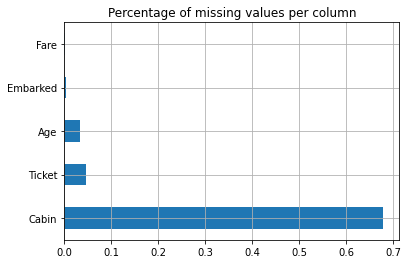

In [77]:
# Percentage of missing values per column
missing_percentage = df.isna().sum().sort_values(ascending=False) / len(df)
missing_columns = missing_percentage[missing_percentage != 0]
missing_columns.plot(kind='barh', title='Percentage of missing values per column', grid=True)
missing_percentage

In [82]:
# Filling missing Age values with median data
# df['Age'] = df['Age'].fillna(df['Age'].median)
df['Age'] = df['Age'].replace(np.NaN, df['Age'].mean())

0    38.355472
1    38.355472
2     0.330000
3    19.000000
4    25.000000
5    35.000000
6     7.000000
7     6.000000
8    27.000000
9    66.000000
Name: Age, dtype: float64

In [83]:
# Dropping missing Embarked values
df.dropna(subset=['Embarked'], how='any', inplace=True)

## Data exploration

### Feature description
- **Pclass** - 1 is an upper, 2 is a middle and 3 is a lower class;
- **Sex** - male/female;
- **Age** - estimated age of the passenger;
- **SibSp** - number of siblings / spouses aboard;
- **Parch** - number of parents / children aboard;
- **Fare** - ticket fare;
- **Cabin** - the cabin number;
- **Emarked** - port: C (Cherbourg), Q (Queenstown) and S (Southampton);
- **Ticket** - ticket number;
- **Name** - name of the passanger;
- **Survived** - 0 means not survived, 1 is survived.

#### Survived

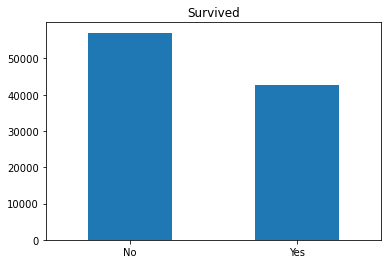

In [84]:
ax = df['Survived'].replace({
    0: 'No',
    1: 'Yes'
}).value_counts().plot.bar(rot=0)
ax.set_title('Survived')
plt.show()

In [85]:
survival_percent = df['Survived'].replace({
    0: 'No',
    1: 'Yes'
}).value_counts() / len(df['Survived'])
survival_percent

No     0.572411
Yes    0.427589
Name: Survived, dtype: float64

#### Age

Text(0.5, 1.0, 'Density plot')

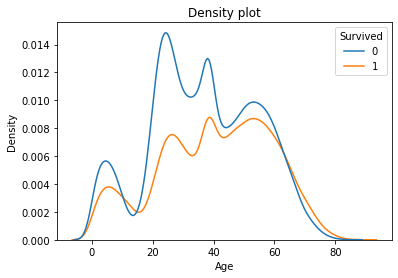

In [92]:
# Density plot (age and survival)
age_plot = sns.kdeplot(x = df['Age'], hue = df['Survived'], data = df)
age_plot.set_title('Density plot')

In [87]:
df['Age'].describe()

count    99750.000000
mean        38.352787
std         18.009721
min          0.080000
25%         25.000000
50%         38.355472
75%         53.000000
max         87.000000
Name: Age, dtype: float64

In [88]:
# Correlation between age and survival
df['Age'].corr(df['Survived'])

0.10227295579183787

[Text(0.5, 1.0, 'Comparison of the number of survived and non-survived passengers of different ages')]

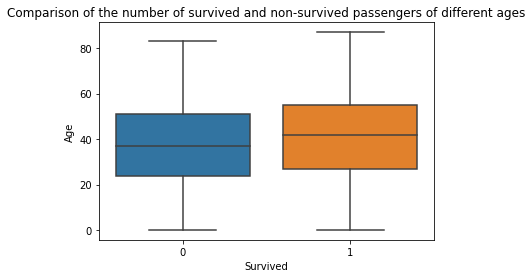

In [89]:
# Boxplot (age and survival)
sns.boxplot(data=df, x = 'Survived', y='Age').set(title='Comparison of the number of survived and non-survived passengers of different ages')

#### Passenger class

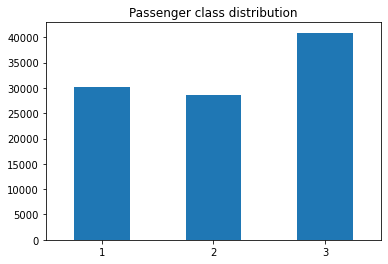

In [93]:
ax = df['Pclass'].value_counts().sort_index().plot.bar(rot=0)
ax.set_title('Passenger class distribution')
plt.show()

In [94]:
class_percent = df['Pclass'].value_counts() / len(df['Pclass'])
class_percent

3    0.410145
1    0.303048
2    0.286807
Name: Pclass, dtype: float64

Text(0, 0.5, 'Count')

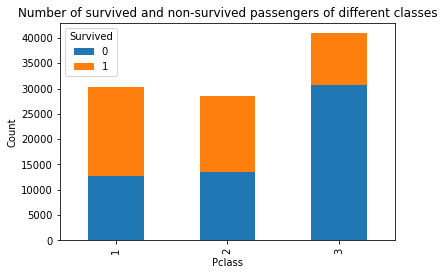

In [105]:
# Number of survived and non-survived passengers of different classes
pclass_data = df.groupby(['Survived', 'Pclass']).size().reset_index().pivot(columns='Survived', index='Pclass', values=0)

pclass_plot = pclass_data.plot(kind='bar', stacked=True)
pclass_plot.set(title='Number of survived and non-survived passengers of different classes')
pclass_plot.set_xlabel("Pclass")
pclass_plot.set_ylabel("Count")

In [96]:
# Correlation between passenger class and survival
df['Pclass'].corr(df['Survived'])

-0.28952922930631037

#### Sex

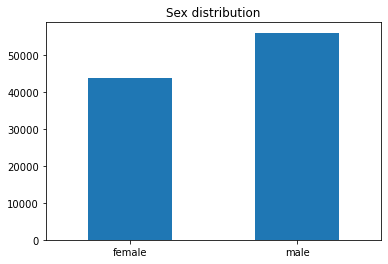

In [97]:
# Sex distribution among passengers
ax = df['Sex'].value_counts().sort_index().plot.bar(rot=0)
ax.set_title('Sex distribution')
plt.show()

In [98]:
sex_percent = df['Sex'].value_counts() / len(df['Sex'])
sex_percent

male      0.561353
female    0.438647
Name: Sex, dtype: float64

In [99]:
# Correlation between sex and survival
df['Sex'].corr(df['Survived'], 'spearman')

-0.5069738654833602

Text(0, 0.5, 'Count')

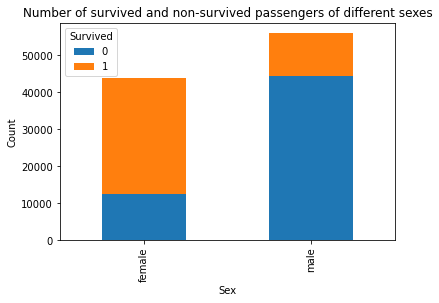

In [104]:
# Number of survived and non-survived passengers of different sexes
sex_data = df.groupby(['Survived', 'Sex']).size().reset_index().pivot(columns='Survived', index='Sex', values=0)

sex_plot = sex_data.plot(kind='bar', stacked=True)
sex_plot.set(title='Number of survived and non-survived passengers of different sexes')
sex_plot.set_xlabel("Sex")
sex_plot.set_ylabel("Count")

#### Siblings / spouse

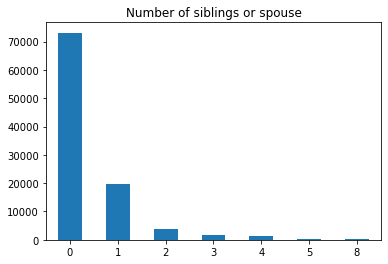

In [106]:
df['SibSp'].value_counts().sort_index().plot.bar(rot=0)
plt.title('Number of siblings or spouse')
plt.show()

In [107]:
df['SibSp'].corr(df['Survived'], 'spearman')

0.0016470911117280073

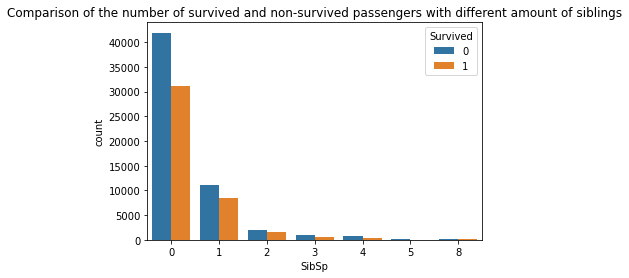

In [108]:
sns.countplot(data = df, x = 'SibSp', hue = 'Survived').set(title='Comparison of the number of survived and non-survived passengers with different amount of siblings')
plt.show()

#### Parents / children

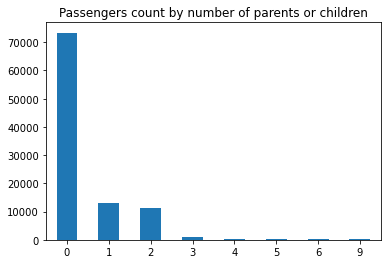

In [110]:
df['Parch'].value_counts().sort_index().plot.bar(rot=0)
plt.title('Passengers count by number of parents or children')
plt.show()

In [111]:
df['Parch'].corr(df['Survived'], 'spearman')

0.059464984993423904

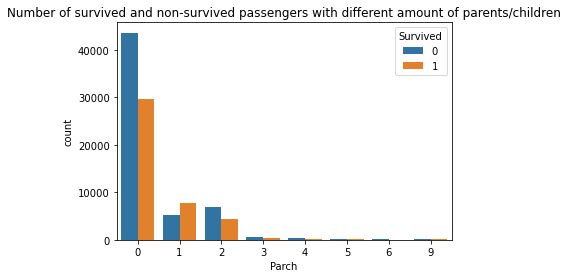

In [113]:
sns.countplot(data = df, x = 'Parch', hue = 'Survived').set(title='Number of survived and non-survived passengers with different amount of parents/children')
plt.show()

#### Fare

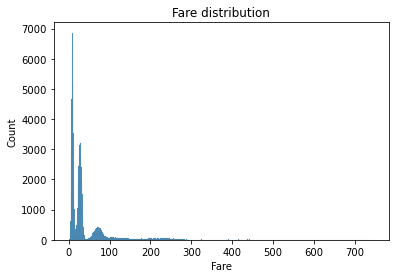

In [114]:
sns.histplot(df['Fare'])
plt.title('Fare distribution')
plt.show()

[Text(0.5, 1.0, 'Comparison of the number of survived and non-survived passengers of different fares')]

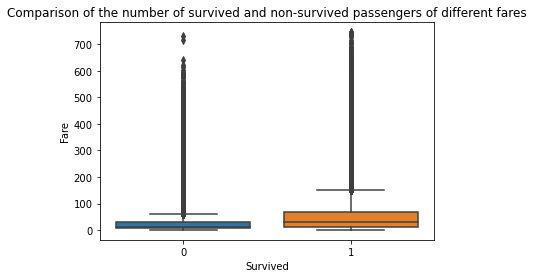

In [115]:
sns.boxplot(data=df, x = 'Survived', y='Fare').set(title='Comparison of the number of survived and non-survived passengers of different fares')

In [116]:
df['Fare'].corr(df['Survived'], 'spearman')

0.2737638930182737

#### Cabin

In [117]:
# Cabin letters, numbers and null values
df['cabin_number'] = df['Cabin'].str.extract('(\d+)').astype('float64')
df['cabin_letter'] = df['Cabin'].str.extract('([A-Za-z])')
df['cabin_null'] = df['Cabin'].isnull()

In [118]:
# Passengers with/without cabin survival
pd.crosstab(df['cabin_null'], df['Survived']).div(df['cabin_null'].value_counts().sort_index(), axis='rows')

Survived,0,1
cabin_null,,
False,0.391531,0.608469
True,0.658026,0.341974


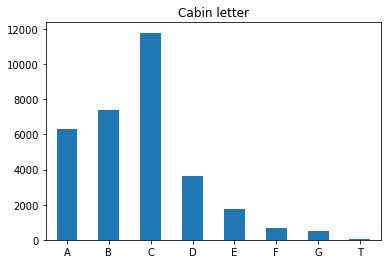

In [119]:
# Cabin letter values count
df['cabin_letter'].value_counts().sort_index().plot.bar(rot=0)
plt.title('Cabin letter')
plt.show()

Text(0, 0.5, 'Count')

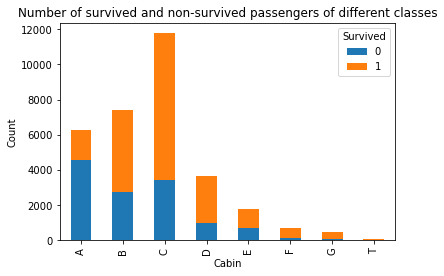

In [128]:
# Number of survived and non-survived passengers of different cabins
cabin_data = df.groupby(['Survived', 'cabin_letter']).size().reset_index().pivot(columns='Survived', index='cabin_letter', values=0)

cabin_plot = cabin_data.plot(kind='bar', stacked=True)
cabin_plot.set(title='Number of survived and non-survived passengers of different classes')
cabin_plot.set_xlabel("Cabin")
cabin_plot.set_ylabel("Count")

In [121]:
df['cabin_letter'].corr(df['Survived'], 'spearman')

0.28436529868641086

<AxesSubplot:xlabel='cabin_number', ylabel='Count'>

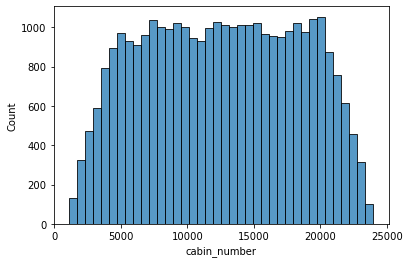

In [122]:
# Cabin number distribution
sns.histplot(df['cabin_number'])

<AxesSubplot:xlabel='Survived', ylabel='cabin_number'>

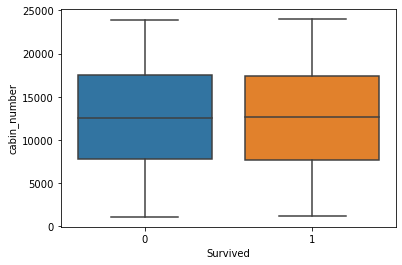

In [123]:
sns.boxplot(data=df, x = 'Survived', y = 'cabin_number')

#### Embarked

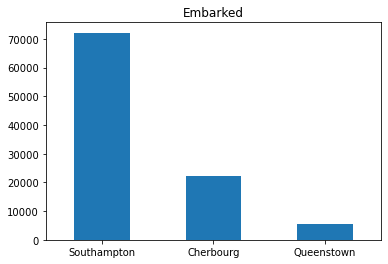

In [125]:
ax = df['Embarked'].replace({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
}).value_counts().plot.bar(rot=0)
ax.set_title('Embarked')
plt.show()

Text(0, 0.5, 'Count')

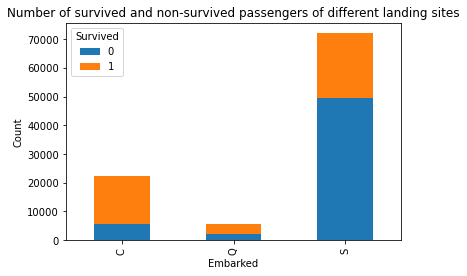

In [129]:
# Number of survived and non-survived passengers of different landing sites
embarked_data = df.groupby(['Survived', 'Embarked']).size().reset_index().pivot(columns='Survived', index='Embarked', values=0)

embarked_plot = embarked_data.plot(kind='bar', stacked=True)
embarked_plot.set(title='Number of survived and non-survived passengers of different landing sites')
embarked_plot.set_xlabel("Embarked")
embarked_plot.set_ylabel("Count")

In [127]:
df['Embarked'].corr(df['Survived'], 'spearman')

-0.3722231712174781

## Summary

### Data quality observations
- There are no duplicated in the dataset
- There are 76165 missing values in the dataset
- Columns with missing values are Cabin, Ticket, Age, Embarked and Fare
- Column Cabin has 67.8% of missing values (can be a mistake, can be real data (passengers without cabins))
- Age missing values were filled with median values

### Feature observations
#### Survived
- 57.23% of passengers didn't survived the trip

#### Age
- Mean age is 35 years old
- Age distribution has peaks around 8, 25 and 55 years
- Correlation between age and survival equals 0.1 which is low
- Older passengers (above 40) have a little more probability to survive

#### Passenger class
- 41% of passengers travelled in the third class, there were about the same number of passengers in the first and the second class 
- Passengers from the third class are less likely to survive
- Correlation between passenger class and survival is not high (-0.29)

#### Sex 
- There are 56% of male passengers
- There is a strong dependency between sex and survival - women have much more probability to survive 

#### Siblings / spouse
- Most of the passengers don't have any siblings or spouse
- Correlation between siblings/spouse presence and survival almost equals 0

#### Parents / children
- Most of the passengers travel without parents/children
- Correlation between children/parents presence and survival a bit higher than previous, but still almost equals 0

#### Fare
- There is a dependency between ticket's cost and survival (Spearman coefficient equals 0.274)
- People with more expensive tickes have more chances to survive

#### Cabin
- Cabin information is missing the most
- Cabin has letter and number values
- Cabin presence and survival have a noticable dependency
- 65.79% passengers without cabin didn't survive the trip (or else it was difficult to determine the cabins of non-surviving passengers)
- The most popular cabin letter 'C' (almost 12000) has the highest survival rate (according to Wiki: the C Deck, also called the Shelter Deck, was the highest deck to run uninterrupted from stem to stern)
- Cabin number distribution seems to be random and doesn't have correlation with passenger survival

#### Embarked
- The most popular landing site is Southampton
- There is a correlation between landing site and survival